In [1]:
# Initial imports.
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
# Read in batting and fielding dataframe.
BatField_df = pd.read_csv(r'data\ml_BattingFielding.csv')
BatField_df.head()

,playerID,inducted,R,H,2B,3B,HR,RBI,SB,CS,...,IBB,SH,SF,GIDP,AVG,PO,A,E,DP,award_count
0,aaronha01,Y,2174,3771,624,98,755,2297,240,73,...,293,21,121,328,0.304998,7436,429,144,218,16
1,abbotji01,N,0,2,0,0,0,3,0,0,...,0,3,0,0,0.095238,72,300,9,16,2
2,adamsba01,N,79,216,31,15,3,75,1,1,...,0,35,0,0,0.211973,58,648,17,17,2
3,ageeto01,N,558,999,170,27,130,433,167,81,...,26,21,15,99,0.255368,2371,53,61,18,3
4,akerja01,N,3,7,2,0,0,4,0,0,...,0,10,0,1,0.076087,65,167,8,20,1


In [3]:
# Check shape of df.
BatField_df.shape

(751, 22)

In [4]:
# Check for null values.
BatField_df.isnull().sum()

playerID       0
inducted       0
R              0
H              0
2B             0
3B             0
HR             0
RBI            0
SB             0
CS             0
BB             0
SO             0
IBB            0
SH             0
SF             0
GIDP           0
AVG            5
PO             0
A              0
E              0
DP             0
award_count    0
dtype: int64

In [5]:
# Drop null values.
BatField_df = BatField_df.dropna(subset=['AVG'])

In [6]:
# Double check df shape
BatField_df.shape

(746, 22)

In [7]:
# Read in pitching dataframe.
Pitch_df = pd.read_csv(r'data\ml_Pitching.csv')
Pitch_df.head()

,playerID,inducted,W,L,CG,SHO,SV,H_allowed,ER,HR_allowed,...,BAOpp,ERA,WP,HitBatsmen,BK,R_allowed,SH_allowed,SF_allowed,GIDP_pitcher,award_count
0,abbotji01,N,87,108,31,6,0,1779,791,154,...,0.280364,4.496364,53,32,11,880,70,47,200,2
1,adamsba01,N,194,140,206,44,15,2841,917,68,...,0.256667,3.733684,26,47,2,1129,0,0,0,2
2,akerja01,N,47,45,0,0,123,679,272,64,...,0.253571,3.854286,13,40,0,312,32,12,19,1
3,alexape01,Y,373,208,437,90,32,4868,1476,164,...,0.253810,2.972381,39,70,1,1851,0,0,0,21
4,allenjo02,N,142,75,109,17,18,1849,813,104,...,0.244667,3.765333,68,38,5,924,0,0,0,4


In [8]:
# Check dataframe shape.
Pitch_df.shape

(284, 22)

In [9]:
# Check for null values.
Pitch_df.isnull().sum()

playerID         0
inducted         0
W                0
L                0
CG               0
SHO              0
SV               0
H_allowed        0
ER               0
HR_allowed       0
BB_allowed       0
StruckOut        0
BAOpp           14
ERA              2
WP               0
HitBatsmen       0
BK               0
R_allowed        0
SH_allowed       0
SF_allowed       0
GIDP_pitcher     0
award_count      0
dtype: int64

In [10]:
# Drop the rows with null values
Pitch_df = Pitch_df.dropna(subset=['ERA','BAOpp'])

In [11]:
# Double check shape of df.
Pitch_df.shape

(268, 22)

In [12]:
# define which dataframe will be used in machine learning model
# e.g. pitching or batting/fielding

# COMMENT OUT WHICHEVER YOU DO NOT WANT TO RUN!

df = BatField_df

# df = Pitch_df

In [13]:
# test conditional to compare / identify df's (for use later in code)
if df.equals(Pitch_df):
    print('Pitching')
if df.equals(BatField_df):
    print('Batting/Fielding')

Batting/Fielding


In [14]:
# encode inducted column from Y/N to numeric 0/1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2 = df.copy()
df2['inducted'] = le.fit_transform(df2['inducted'])

In [15]:
# encode playerID to numeric
# possibly remove if we want to keep playerID's as index to later reference player names

# df2['playerID'] = le.fit_transform(df2['playerID'])

In [16]:
# define input (X) and output (y) variables
# drop columns of unnecessary features in X 
# batting/fielding 1st iteration showed the following features contributed <3%:
# SF, CS, IBB, SB

y = df2["inducted"]
if df.equals(BatField_df):
    X = df2.drop(columns=["inducted", "playerID", "SF", "CS", "IBB", "SB"])  # Batters/Fielders
if df.equals(Pitch_df):
    X = df2.drop(columns=["inducted", "playerID"]) # Pitchers

In [17]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [18]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

In [20]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [21]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)

In [22]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,127,12
Actual 1,13,35


In [23]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)

In [24]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,127,12
Actual 1,13,35


Accuracy Score : 0.8663101604278075
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       139
           1       0.74      0.73      0.74        48

    accuracy                           0.87       187
   macro avg       0.83      0.82      0.82       187
weighted avg       0.87      0.87      0.87       187



In [25]:
# Calculate feature importance in the Random Forest model & sort largest to smallest
importances = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances

[(0.16147912339241308, 'award_count'),
 (0.09405157260170642, 'R'),
 (0.09112768741100967, 'AVG'),
 (0.09031537296116243, 'H'),
 (0.06312932357843094, 'A'),
 (0.05852511210356192, 'RBI'),
 (0.055836295695513474, 'SO'),
 (0.048173059370415085, 'E'),
 (0.04618862487663315, 'PO'),
 (0.04595590841272363, '3B'),
 (0.0439440495451252, '2B'),
 (0.043821710445384736, 'SH'),
 (0.04295532881342847, 'BB'),
 (0.03826045232174703, 'GIDP'),
 (0.03818608929511483, 'DP'),
 (0.03805028917562995, 'HR')]

In [26]:
# sort the features by their importance.
sorted(zip(X.columns), reverse=True)

[('award_count',),
 ('SO',),
 ('SH',),
 ('RBI',),
 ('R',),
 ('PO',),
 ('HR',),
 ('H',),
 ('GIDP',),
 ('E',),
 ('DP',),
 ('BB',),
 ('AVG',),
 ('A',),
 ('3B',),
 ('2B',)]

In [27]:
rf_model.feature_importances_.sum()

1.0

In [28]:
x = [lis[-1] for lis in importances]
x

['award_count',
 'R',
 'AVG',
 'H',
 'A',
 'RBI',
 'SO',
 'E',
 'PO',
 '3B',
 '2B',
 'SH',
 'BB',
 'GIDP',
 'DP',
 'HR']

In [29]:
y = [lis[0] for lis in importances]
y

[0.16147912339241308,
 0.09405157260170642,
 0.09112768741100967,
 0.09031537296116243,
 0.06312932357843094,
 0.05852511210356192,
 0.055836295695513474,
 0.048173059370415085,
 0.04618862487663315,
 0.04595590841272363,
 0.0439440495451252,
 0.043821710445384736,
 0.04295532881342847,
 0.03826045232174703,
 0.03818608929511483,
 0.03805028917562995]

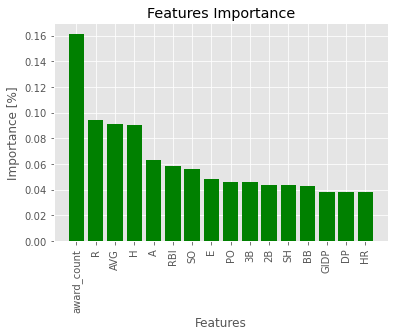

In [30]:
# DANE'S CODE:
# %matplotlib inline
# plt.style.use('ggplot')
# x = ['R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'SO', 'SH', 'AVG', 'PO', 'A', 'E', 'DP', 'award_count']
# y = importances
# x_pos = [i for i, _ in enumerate(x)]

# plt.bar(x_pos, importances, color='green')
# plt.xlabel('Features Importance')
# plt.show()

# NICK's comments
# would like to investigate how to auto generate x list instead of manually entering
# Need to label x ticks
# would like to reorder, largest to smallest

# TRY THIS CODE:
%matplotlib inline
plt.style.use('ggplot')
x = [lis[-1] for lis in importances]
y = [lis[0] for lis in importances]
x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, y, color='green')
plt.title('Features Importance')
plt.xlabel('Features')
plt.ylabel('Importance [%]')

plt.xticks(x_pos,x,rotation=90,ha='center')
plt.show()

In [31]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [32]:
print (X_test) #test dataset (without the actual outcome)
print (y_pred) #predicted values

        R     H   2B  3B   HR   RBI    BB   SO   SH  GIDP       AVG     PO  \
549    82   187   35   4    4    79    46  317  135    11  0.167713    328   
543    45   112   15   1    1    50    47  145   63    17  0.184211     84   
537     0     1    0   0    0     1     1    1    0     0  0.166667     97   
563  1232  2848  482  68  268  1357   860  990  101   297  0.267317   2712   
308    42    92   18   0    4    49    44  243  117     6  0.122995    165   
..    ...   ...  ...  ..  ...   ...   ...  ...  ...   ...       ...    ...   
4       3     7    2   0    0     4     1   51   10     1  0.076087     65   
457   940  2091  484  66  191  1097   648  779   28   186  0.289692    887   
620  1074  2472  483  47  248  1389   855  694   11   287  0.284793  10544   
627  1257  2460  402  69   28   793  1072  589  214   167  0.261814   4249   
431    32    57    3   0    0    23    57  217   41     7  0.129252     68   

        A    E    DP  award_count  
549   667   29    39       

In [33]:
df2

,playerID,inducted,R,H,2B,3B,HR,RBI,SB,CS,...,IBB,SH,SF,GIDP,AVG,PO,A,E,DP,award_count
0,aaronha01,1,2174,3771,624,98,755,2297,240,73,...,293,21,121,328,0.304998,7436,429,144,218,16
1,abbotji01,0,0,2,0,0,0,3,0,0,...,0,3,0,0,0.095238,72,300,9,16,2
2,adamsba01,0,79,216,31,15,3,75,1,1,...,0,35,0,0,0.211973,58,648,17,17,2
3,ageeto01,0,558,999,170,27,130,433,167,81,...,26,21,15,99,0.255368,2371,53,61,18,3
4,akerja01,0,3,7,2,0,0,4,0,0,...,0,10,0,1,0.076087,65,167,8,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,yountro01,1,1632,3142,583,126,251,1406,271,105,...,95,104,123,217,0.285429,5855,4850,305,963,12
747,zachrpa01,0,9,36,0,0,0,6,0,0,...,0,33,2,11,0.113208,60,176,13,19,1
748,zahnge01,0,3,6,0,0,0,1,0,0,...,0,10,0,1,0.139535,87,326,24,19,1
749,zambrca01,0,75,165,26,3,24,71,1,0,...,0,37,4,14,0.238095,168,290,25,29,3


In [34]:
df2.columns

Index(['playerID', 'inducted', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS',
       'BB', 'SO', 'IBB', 'SH', 'SF', 'GIDP', 'AVG', 'PO', 'A', 'E', 'DP',
       'award_count'],
      dtype='object')

In [35]:
# create df with all data to investigate statistical trends
df3 = pd.merge(X_test, df2[["inducted","playerID"]], how="inner", left_index=True, right_index=True)

if df.equals(BatField_df):
    # This one is specific to Batting/Fielding!!!
    df3 = df3[['playerID','R','H','2B','3B','HR','RBI','BB','SO','SH','GIDP','AVG','PO','A','E','DP','award_count','inducted']]
    
if df.equals(Pitch_df):
    # This one is specific to Pitching
    df3 = df3[['playerID','W','L','CG','SHO','SV','H_allowed','ER','HR_allowed','BB_allowed','StruckOut','BAOpp','ERA','WP','HitBatsmen','BK','R_allowed','SH_allowed','SF_allowed','GIDP_pitcher','award_count','inducted']]
    
df3["predicted"] = y_pred   
df3

,playerID,R,H,2B,3B,HR,RBI,BB,SO,SH,GIDP,AVG,PO,A,E,DP,award_count,inducted,predicted
549,reuscri01,82,187,35,4,4,79,46,317,135,11,0.167713,328,667,29,39,4,0,1
543,raschvi01,45,112,15,1,1,50,47,145,63,17,0.184211,84,259,8,20,6,0,0
537,quiseda01,0,1,0,0,0,1,1,1,0,0,0.166667,97,264,13,22,10,0,1
563,robinbr01,1232,2848,482,68,268,1357,860,990,101,297,0.267317,2712,6220,264,621,32,1,1
308,hootobu01,42,92,18,0,4,49,44,243,117,6,0.122995,165,373,16,21,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,akerja01,3,7,2,0,0,4,1,51,10,1,0.076087,65,167,8,20,1,0,0
457,mcraeha01,940,2091,484,66,191,1097,648,779,28,186,0.289692,887,84,41,18,4,0,0
620,simmote01,1074,2472,483,47,248,1389,855,694,11,287,0.284793,10544,1092,169,248,4,0,0
627,smithoz01,1257,2460,402,69,28,793,1072,589,214,167,0.261814,4249,8375,281,1590,23,1,1


In [36]:
# Append dataframe with column comparing actual inducted to predicted accuracy.
df3['Accuracy'] = np.where(df3['inducted'] == df3['predicted'], 'Yes', 'No')
df3.head()

,playerID,R,H,2B,3B,HR,RBI,BB,SO,SH,GIDP,AVG,PO,A,E,DP,award_count,inducted,predicted,Accuracy
549,reuscri01,82,187,35,4,4,79,46,317,135,11,0.167713,328,667,29,39,4,0,1,No
543,raschvi01,45,112,15,1,1,50,47,145,63,17,0.184211,84,259,8,20,6,0,0,Yes
537,quiseda01,0,1,0,0,0,1,1,1,0,0,0.166667,97,264,13,22,10,0,1,No
563,robinbr01,1232,2848,482,68,268,1357,860,990,101,297,0.267317,2712,6220,264,621,32,1,1,Yes
308,hootobu01,42,92,18,0,4,49,44,243,117,6,0.122995,165,373,16,21,1,0,0,Yes


C:\Users\angel\anaconda3\envs\PythonData\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


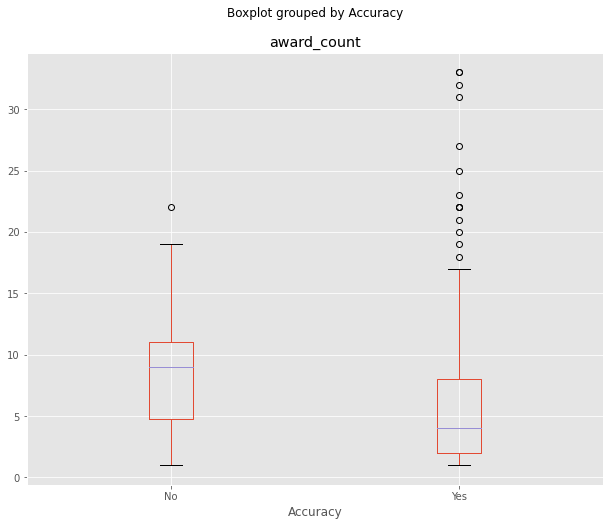

In [37]:
# Create boxplot comparing award count data of inaccurately predicted outcomes versus accurately predicted outcomes. 
fig, ax = plt.subplots(figsize=(10,8))
df3.boxplot(column='award_count', by='Accuracy', ax=ax)

C:\Users\angel\anaconda3\envs\PythonData\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


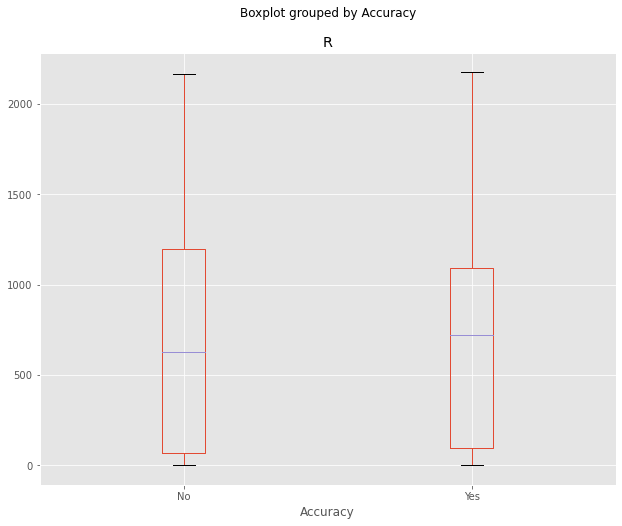

In [38]:
# Create boxplot comparing runs data of inaccurately predicted outcomes versus accurately predicted outcomes. 
fig, ax = plt.subplots(figsize=(10,8))
df3.boxplot(column='R', by='Accuracy', ax=ax)

C:\Users\angel\anaconda3\envs\PythonData\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


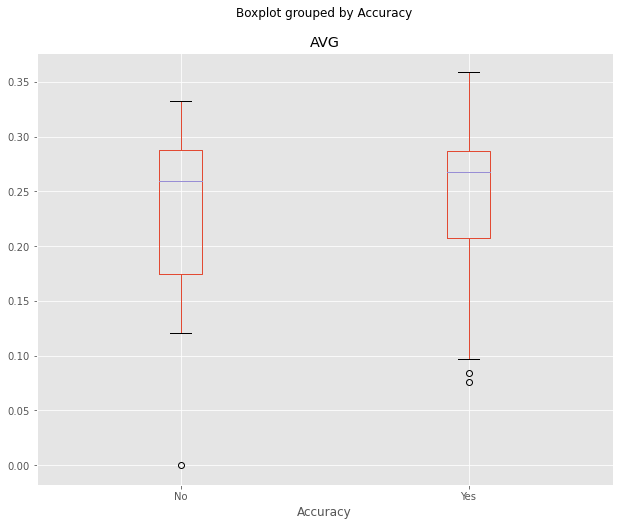

In [39]:
# Create boxplot comparing batting average data of inaccurately predicted outcomes versus accurately predicted outcomes. 
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df3.boxplot(column='AVG', by='Accuracy', ax=ax)

C:\Users\angel\anaconda3\envs\PythonData\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


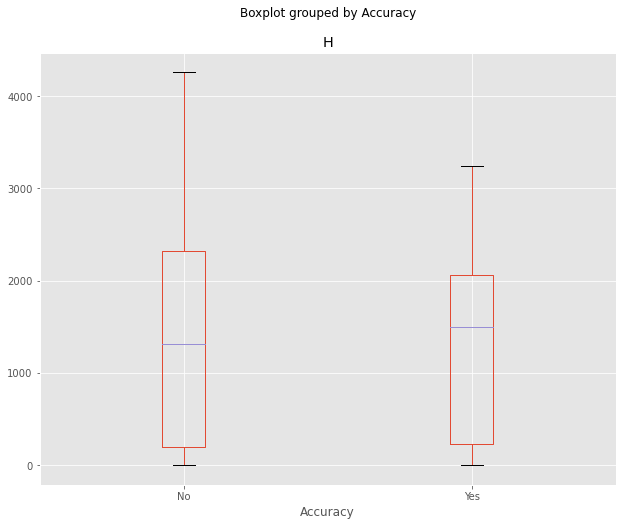

In [40]:
# Create boxplot comparing hits data of inaccurately predicted outcomes versus accurately predicted outcomes. 
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df3.boxplot(column='H', by='Accuracy', ax=ax)

In [41]:
# Create dataframe of only inaccurate predictions.
accuracy = df3.groupby('Accuracy')
no_df = accuracy.get_group('No')
no_df.head()

,playerID,R,H,2B,3B,HR,RBI,BB,SO,SH,GIDP,AVG,PO,A,E,DP,award_count,inducted,predicted,Accuracy
549,reuscri01,82,187,35,4,4,79,46,317,135,11,0.167713,328,667,29,39,4,0,1,No
537,quiseda01,0,1,0,0,0,1,1,1,0,0,0.166667,97,264,13,22,10,0,1,No
328,jenkife01,54,148,27,6,13,85,41,326,66,9,0.165179,363,660,49,45,5,1,0,No
65,boudrlo01,861,1779,385,66,68,789,796,309,164,155,0.295074,3265,4877,230,1205,11,1,0,No
68,boyerke01,1104,2143,318,68,282,1141,713,1017,17,185,0.287458,2376,3737,274,417,14,0,1,No


In [42]:
# Create dataframe of only accurate predictions.
yes_df = accuracy.get_group('Yes')
yes_df.head()

,playerID,R,H,2B,3B,HR,RBI,BB,SO,SH,GIDP,AVG,PO,A,E,DP,award_count,inducted,predicted,Accuracy
543,raschvi01,45,112,15,1,1,50,47,145,63,17,0.184211,84,259,8,20,6,0,0,Yes
563,robinbr01,1232,2848,482,68,268,1357,860,990,101,297,0.267317,2712,6220,264,621,32,1,1,Yes
308,hootobu01,42,92,18,0,4,49,44,243,117,6,0.122995,165,373,16,21,1,0,0,Yes
608,scottge02,957,1992,306,60,271,1051,699,1418,22,277,0.267994,15601,1520,201,1527,8,0,0,Yes
105,carribi02,194,506,67,14,6,235,206,147,79,0,0.256853,3093,863,116,74,3,0,0,Yes


In [43]:
# Show mean data for each feature grouped by accuracy of prediction.
mean_summary = df3.groupby('Accuracy').mean()
mean_summary

,R,H,2B,3B,HR,RBI,BB,SO,SH,GIDP,AVG,PO,A,E,DP,award_count,inducted,predicted
Accuracy,,,,,,,,,,,,,,,,,,
No,679.357143,1287.500000,217.000000,39.428571,140.750000,642.500000,491.642857,618.464286,69.785714,77.357143,0.234526,4412.428571,1352.785714,121.785714,390.285714,9.035714,0.535714,0.464286
Yes,695.622642,1345.496855,235.056604,41.125786,142.396226,684.446541,503.257862,644.257862,61.100629,92.704403,0.246974,4009.245283,1505.333333,117.723270,382.943396,6.320755,0.207547,0.207547
